In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [7]:
house_train = pd.read_csv('./train_0-22.csv')
house_test = pd.read_csv('./test_0-22.csv')
display(house_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
# 数値のみのデータを抜き出し、欠損値を削除する
house_train_number = house_train.select_dtypes(include = 'number').dropna()
display(house_train_number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,0,0,0,0,0,0,0,2,2008,129500


In [4]:
# 相関関係を表示す
house_corr = house_train_number.corr()

In [5]:
# 相関関係の上位１４を表示
display(house_corr.head(15))
display(house_corr.sort_values('SalePrice', ascending=False).head(15))
display('type: {}'.format( type(house_corr.sort_values('SalePrice', ascending=False))))
display(house_corr.sort_values('SalePrice', ascending=False)['SalePrice'].head(15))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.021937,-0.013289,-0.040711,-0.058269,0.004387,-0.020862,-0.027664,-0.073472,-0.013751,...,-0.025060,-0.001972,0.009935,-0.066833,0.015183,0.048010,0.045799,-0.000570,0.013407,-0.047122
MSSubClass,0.021937,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,...,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.013289,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,...,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.040711,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,...,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,-0.058269,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,0.004387,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,...,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,-0.020862,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,...,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,-0.027664,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,...,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,-0.073472,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,...,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.013751,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,...,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.047122,-0.088032,0.344270,0.299962,0.797881,-0.124391,0.525394,0.521253,0.488658,0.390301,...,0.336855,0.343354,-0.154843,0.030777,0.110427,0.092488,-0.036041,0.051568,-0.011869,1.000000
OverallQual,-0.058269,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
GrLivArea,-0.011068,0.083365,0.396306,0.307164,0.607466,-0.112231,0.204967,0.290050,0.414024,0.239888,...,0.269703,0.353534,-0.014874,0.004823,0.108453,0.198551,0.001067,0.053071,-0.024436,0.705154
GarageCars,-0.008125,-0.027411,0.286587,0.172428,0.593803,-0.267859,0.532563,0.462663,0.375269,0.196443,...,0.234276,0.258137,-0.151886,0.020141,0.025135,0.012829,-0.069592,0.057481,-0.033507,0.647034
GarageArea,-0.025889,-0.092607,0.356851,0.211362,0.550659,-0.226347,0.471286,0.407471,0.382162,0.286657,...,0.223955,0.302558,-0.115749,0.015306,0.026446,0.080871,-0.036993,0.037597,-0.016206,0.619330
TotalBsmtSF,-0.023129,-0.247781,0.387620,0.302554,0.563960,-0.192762,0.409134,0.308696,0.384434,0.530917,...,0.233664,0.291286,-0.130223,0.033743,0.080259,0.171489,-0.031076,-0.001498,-0.003377,0.615612
1stFlrSF,-0.008046,-0.252249,0.451085,0.329679,0.514453,-0.164251,0.308875,0.281436,0.363209,0.468020,...,0.237628,0.244846,-0.113595,0.037505,0.087580,0.151761,-0.030909,0.027731,0.000420,0.607969
FullBath,0.007220,0.131278,0.185785,0.129073,0.576875,-0.229848,0.500495,0.467563,0.285561,0.052313,...,0.215028,0.286248,-0.164548,0.032051,0.001415,0.049608,-0.029397,0.072305,-0.000015,0.566627
TotRmsAbvGrd,0.020012,0.047209,0.348421,0.237918,0.451008,-0.096901,0.121417,0.181995,0.315604,0.080207,...,0.190527,0.246714,-0.031651,-0.023904,0.070894,0.093387,0.026495,0.043097,-0.024812,0.547067
YearBuilt,-0.020862,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,...,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394


"type: <class 'pandas.core.frame.DataFrame'>"

SalePrice       1.000000
OverallQual     0.797881
GrLivArea       0.705154
GarageCars      0.647034
GarageArea      0.619330
TotalBsmtSF     0.615612
1stFlrSF        0.607969
FullBath        0.566627
TotRmsAbvGrd    0.547067
YearBuilt       0.525394
YearRemodAdd    0.521253
GarageYrBlt     0.504753
MasVnrArea      0.488658
Fireplaces      0.461873
BsmtFinSF1      0.390301
Name: SalePrice, dtype: float64

In [10]:
# dataframeを作る
df_col = ['SalePrice','OverallQual' , 'GrLivArea' , 'GarageCars' , 'GarageArea',
          'TotalBsmtSF' , '1stFlrSF' , 'FullBath' , 'TotRmsAbvGrd' , 'YearBuilt',
          'YearRemodAdd' , 'GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1']
house_train_num_df = house_train_number[df_col]
display(house_train_num_df)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655
5,143000,5,1362,2,480,796,796,1,5,1993,1995,1993.0,0.0,0,732
6,307000,8,1694,2,636,1686,1694,2,7,2004,2005,2004.0,186.0,1,1369
8,129900,7,1774,2,468,952,1022,2,8,1931,1950,1931.0,0.0,2,0
9,118000,5,1077,1,205,991,1077,1,5,1939,1950,1939.0,0.0,2,851
10,129500,5,1040,1,384,1040,1040,1,5,1965,1965,1965.0,0.0,0,906


In [12]:
# データの準備
x = house_train_num_df.drop('SalePrice', axis = 1) # DataFrame. SalePriceに相関がある１４種類のデータ
y = house_train_num_df['SalePrice']# Series. SalePrice

In [17]:
# 線形回帰
slr = LinearRegression()

In [18]:
# fit関数でも出る生成
slr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# 回帰係数
print('回帰係数: {}'.format(slr.coef_))

回帰係数: [ 2.08586396e+04  3.61071518e+01  1.52325620e+04  1.53003593e+01
  1.11948668e+01  3.87113289e+00 -1.46433383e+03  2.34399395e+03
  1.69169441e+02  4.07132008e+02 -8.41604352e+01  2.87459934e+01
  8.39495535e+03  1.99700072e+01]


In [23]:
# 切片
print('切片: {}'.format(slr.intercept_))

切片: -1057905.456865702


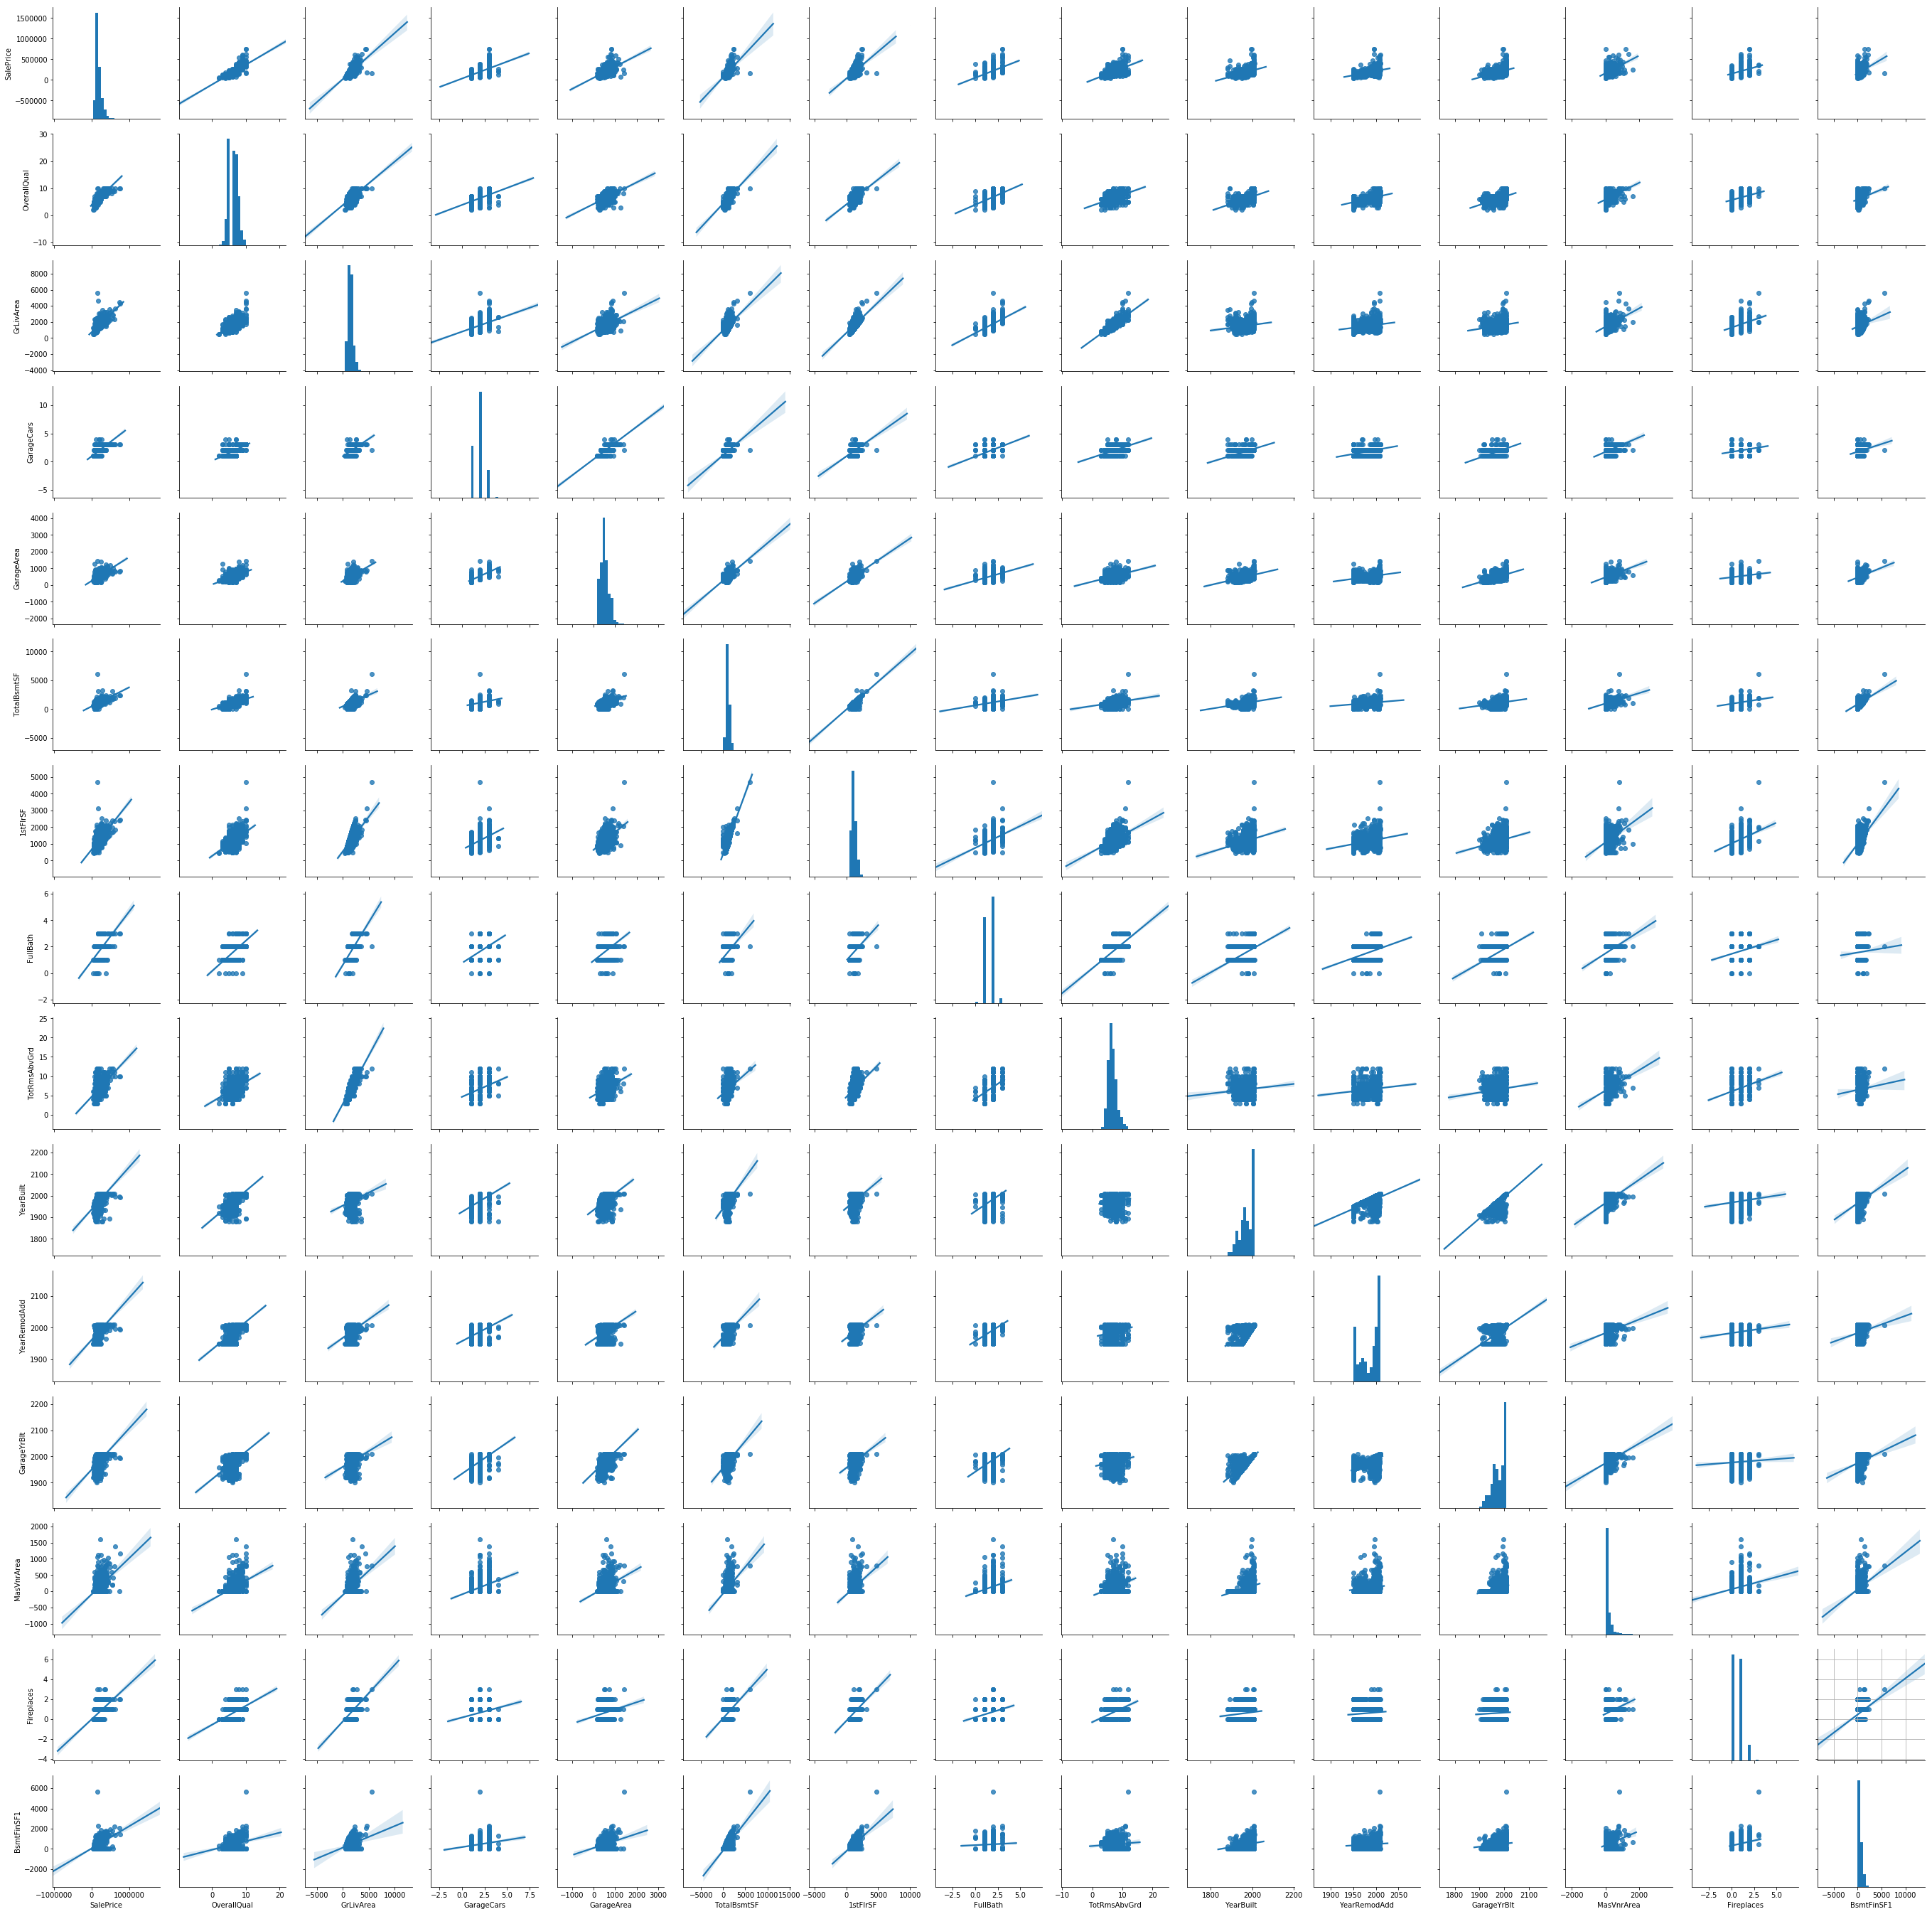

In [26]:
# 統計的データ分析と可視化
sns.pairplot(house_train_num_df, kind="reg")
plt.grid(True)

In [27]:
df_col_test = ['OverallQual' , 'GrLivArea' , 'GarageCars' , 'GarageArea',
               'TotalBsmtSF' , '1stFlrSF' , 'FullBath' , 'TotRmsAbvGrd' , 'YearBuilt',
               'YearRemodAdd' , 'GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1']
x_test = house_test[df_col_test].fillna(method='ffill')

In [29]:
# 学習済みのモデルから予測した結果をセット
y_test_pred = slr.predict(x_test)

In [30]:
display(y_test_pred)

array([103174.10774552, 153010.39133661, 175566.69930938, ...,
       175336.81620823,  97743.95084958, 256613.77303492])

In [31]:
house_test['SalePrice'] = y_test_pred

In [32]:
house_test[['Id', "SalePrice"]].to_csv('submission.csv', index=False)

In [34]:
display(pd.read_csv('./submission.csv'))

,Id,SalePrice
0,1461,103174.107746
1,1462,153010.391337
2,1463,175566.699309
3,1464,194538.515227
4,1465,207060.712386
5,1466,178814.773952
6,1467,180926.615702
7,1468,173680.587275
8,1469,205208.435372
9,1470,102646.958121


In [35]:
house_test[['Id', "SalePrice"]].to_csv('submission_.csv', index=True)
display(pd.read_csv('./submission_.csv'))

,Unnamed: 0,Id,SalePrice
0,0,1461,103174.107746
1,1,1462,153010.391337
2,2,1463,175566.699309
3,3,1464,194538.515227
4,4,1465,207060.712386
5,5,1466,178814.773952
6,6,1467,180926.615702
7,7,1468,173680.587275
8,8,1469,205208.435372
9,9,1470,102646.958121
